In [1]:
from test_MDbrew.opener import DumpOpener
from test_MDbrew.tools import Extractor
from test_MDbrew.MSD import MSD

path = './test.lammpstrj'
data = DumpOpener(path)
database = Extractor(data=data).get_position_db(type_=1)


	 1 data is generated 

	get_position_db :  0.65 s


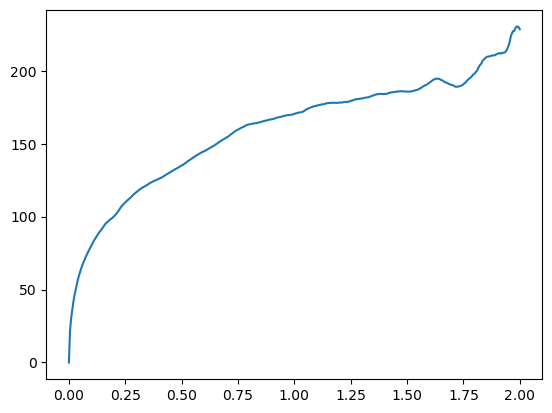

ConnectionError: Please do get_msd first

In [5]:
msd = MSD()
msd.get_msd(database)
msd.plot_msd(time_step=0.005)